<a href="https://colab.research.google.com/github/drewm8080/Analyzing-COVID-19-Data/blob/main/CDC_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**User Input Here**

In [465]:
print('Welcome to CDC Statistics')
print('')
print('Please tell me which state you would like to see. Type abbreivated name of state in caps. EX: FL,GA etc.')
userinput = input('Please put state here:')

Welcome to CDC Statistics

Please tell me which state you would like to see. Type abbreivated name of state in caps. EX: FL,GA etc.
Please put state here:CA


**Framework for Cases and Deaths from The COVID-19 Tracking Project**

In [466]:
# might need this cell if your data does not download directly from the URL
# !pip install fsspec
# !pip install pandas

In [467]:
import pandas as pd
import matplotlib.pyplot as plt

In [468]:
# reading in the data
df = pd.read_csv('https://data.cdc.gov/api/views/9mfq-cb36/rows.csv?accessType=DOWNLOAD')

In [469]:
df = df.loc[:,['submission_date','state','tot_cases','tot_death']]

In [470]:
df['cases'] = df.tot_cases
df['deaths'] = df.tot_death
df['date'] = df.submission_date

In [471]:
df = df.drop(columns=['tot_cases','tot_death','submission_date'])

In [472]:
df = df[df.state == userinput]

In [473]:
# cleaning data
df = df.reset_index(drop = True)

In [474]:
# setting datetime index 
df.date = pd.to_datetime(df.date)

In [475]:
# cleaning data
df = df.sort_values(by = 'date', ascending=True)

In [476]:
# cleaning data
df = df.reset_index(drop = True)

In [477]:
# making sure the data starts after 03-01-2020
df = df[df.date >= '2020-03-01']

In [478]:
# creating day column for each date 
df['Day'] = df.groupby('state')['date'].rank(ascending=True)


In [479]:
# cleaning data
df = df.reset_index(drop = True)

In [480]:
df.loc[df.groupby('state')['date'].head(1).index, 'Avg day of case'] = df.loc[:,'Day']

In [481]:
# calulating Avgerage day of case
for i in range(1, len(df)):
  x = (((df.loc[i, 'cases'] - df.loc[i-1, 'cases']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of case'])) / (df.loc[i, 'cases'])) + (df.loc[i-1, 'Avg day of case'])
  df.loc[i, 'Avg day of case'] = round(x, 2)

In [482]:
# making sure it only calculate where the deaths >0
df = df[df['deaths'] > 0]

In [483]:
# setting the first day as the first row in Avg day of death
df.loc[df.groupby('state')['date'].head(1).index, 'Avg day of death'] = df.loc[:,'Day']

In [484]:
# cleaning data
df = df.reset_index(drop = True)

In [485]:
# calulating Avgerage day of death
for i in range(1, len(df)):
  x = (((df.loc[i, 'deaths'] - df.loc[i-1, 'deaths']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of death'])) / (df.loc[i, 'deaths'])) + (df.loc[i-1, 'Avg day of death'])
  df.loc[i, 'Avg day of death'] = round(x, 2)

In [486]:
# creating the CDF Column
df['cdf_cases'] = df['cases']

In [487]:
# creating the cdf column
df['cdf_deaths'] = df['deaths']

In [488]:
# creating the formula for the CDF column
df.loc[:,'cdf_cases':] = df.loc[:,'cdf_cases':].div(df.iloc[-1]['cdf_cases':])
df = df.reset_index(drop = True)

In [489]:
# creating the formula for the CDF column
df['cdf_deaths'] = df.loc[:,'cdf_deaths':].div(df.iloc[-1]['cdf_deaths':])

In [490]:
# difference of avg death day and avg case day
df['Avg Death Day - Avg Case Day'] = df['Avg day of death'] - df['Avg day of case'] 

In [491]:
# avg day of case/ current day
df['Avg Day of Case/ Current Day'] = df['Avg day of case'] / df['Day']

In [492]:
# avg day of death/ current day
df['Avg Day of Death/ Current Day'] = df['Avg day of death'] / df['Day']

In [493]:
df

,state,cases,deaths,date,Day,Avg day of case,Avg day of death,cdf_cases,cdf_deaths,Avg Death Day - Avg Case Day,Avg Day of Case/ Current Day,Avg Day of Death/ Current Day
0,CA,45,1,2020-03-05,5.0,2.82,5.00,1.26858e-05,1.7685e-05,2.18,0.564000,1.000000
1,CA,56,1,2020-03-06,6.0,3.44,5.00,1.57868e-05,1.7685e-05,1.56,0.573333,0.833333
2,CA,56,1,2020-03-07,7.0,3.44,5.00,1.57868e-05,1.7685e-05,1.56,0.491429,0.714286
3,CA,110,1,2020-03-08,8.0,5.68,5.00,3.10097e-05,1.7685e-05,-0.68,0.710000,0.625000
4,CA,135,2,2020-03-09,9.0,6.29,7.00,3.80573e-05,3.53701e-05,0.71,0.698889,0.777778
...,...,...,...,...,...,...,...,...,...,...,...,...
378,CA,3535534,55795,2021-03-18,383.0,265.83,270.38,0.996689,0.986736,4.55,0.694073,0.705953
379,CA,3538821,56027,2021-03-19,384.0,265.94,270.85,0.997616,0.990839,4.91,0.692552,0.705339
380,CA,3541928,56072,2021-03-20,385.0,266.04,270.94,0.998492,0.991635,4.90,0.691013,0.703740
381,CA,3545278,56118,2021-03-21,386.0,266.15,271.03,0.999436,0.992448,4.88,0.689508,0.702150


 **Statistics**

In [494]:
# creating framework for statistics
averagedayofcase = df['Avg day of case'].iloc[-1]
averagedayofdeath = df['Avg day of death'].iloc[-1]
differDeaths = df['Avg Death Day - Avg Case Day'].max()
differCases= -df['Avg Death Day - Avg Case Day'].min()

In [495]:
print('COVID-19 STATISTICS')
print('')
print('State = ', df.state.iloc[-1])
print('Average Day of Death and Average Day of Case as of',df['date'].iloc[-1])
print('Case =', averagedayofcase)
print('Death = ', averagedayofdeath)
print('Days When Average Dates of Death Differ By Largest Amounts')
print('Death Day – Case Day =', differDeaths)
print('Case Day - Death Day =',differCases)

COVID-19 STATISTICS

State =  CA
Average Day of Death and Average Day of Case as of 2021-03-22 00:00:00
Case = 266.22
Death =  271.91
Days When Average Dates of Death Differ By Largest Amounts
Death Day – Case Day = 5.689999999999998
Case Day - Death Day = 45.53


**Data Visualization**

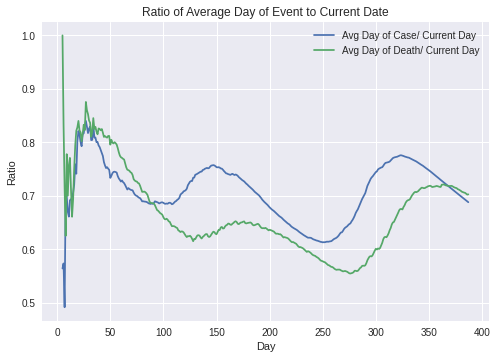

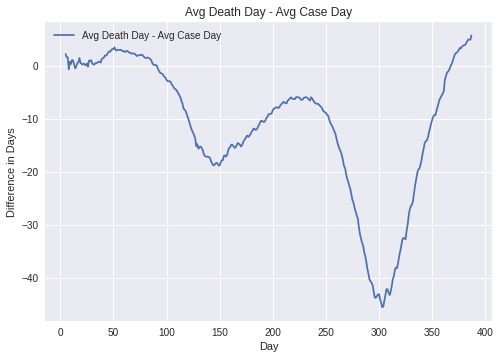

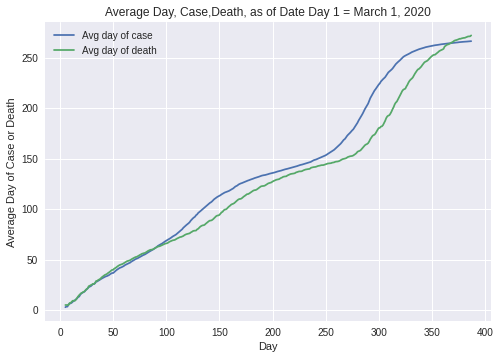

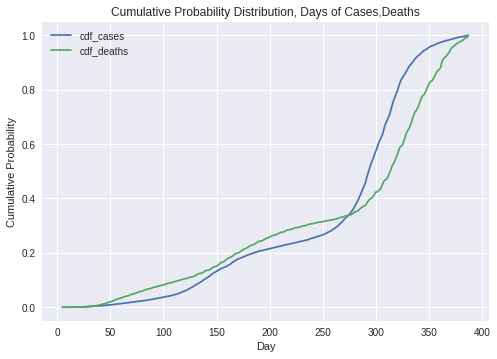

In [496]:
# ratio avg Day of Event/current Date Graph
df.plot(x= 'Day',y = ['Avg Day of Case/ Current Day','Avg Day of Death/ Current Day'],title = 'Ratio of Average Day of Event to Current Date', ylabel = 'Ratio')
# avg hospitalization day - avg case day
df.plot(x = 'Day', y=['Avg Death Day - Avg Case Day'],title = 'Avg Death Day - Avg Case Day',ylabel = 'Difference in Days')
# avg Day of Case/Death/Hospitalization
df.plot(x = 'Day', y= ['Avg day of case','Avg day of death'],title = 'Average Day, Case,Death, as of Date Day 1 = March 1, 2020', ylabel = 'Average Day of Case or Death')
# CDF
df.plot( x= 'Day', y= ['cdf_cases','cdf_deaths'],title = 'Cumulative Probability Distribution, Days of Cases,Deaths', ylabel = 'Cumulative Probability')

plt.style.use('seaborn')